In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

from basicsr.archs.rrdbnet_arch import RRDBNet

from realesrgan import RealESRGANer
from realesrgan.archs.srvgg_arch import SRVGGNetCompact

/home/psdz/miniconda3/envs/SAM/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# params
input_path = "../data/output (3).jpg"
output_path = "results/test.jpg"
outscale = 4
model_path = "weights/RealESRGAN_x4plus.pth"

In [4]:
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
netscale = 4
upsampler = RealESRGANer(
    scale=netscale,
    model_path=model_path,
    model=model
)

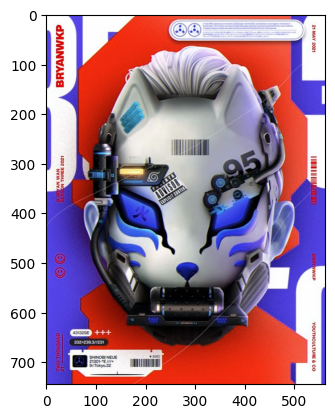

In [5]:
img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
plt.imshow(img)

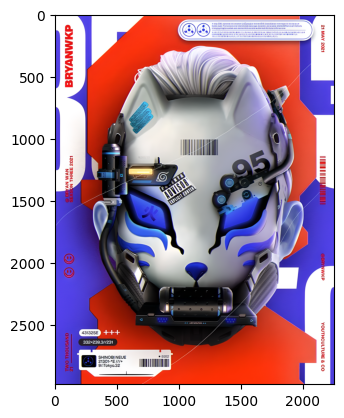

In [6]:
output, _ = upsampler.enhance(img, outscale=outscale)
plt.imshow(output)